<a href="https://colab.research.google.com/github/MrMashood/TimeSeriesForecasting-Prophet-/blob/main/AppliancesCountAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries and Loading Data

In [ ]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df= pd.read_csv('/content/energydata.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-16 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-16 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-16 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-16 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-16 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.shape

(19735, 29)

In [ ]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

##Preprocessing and Changing Data for Prophet Model

In [ ]:
df = df[['date', 'Appliances']]
df['date'] = pd.to_datetime(df['date'], dayfirst=True).dt.date
df = df.groupby('date', as_index=False).sum()
df

<ipython-input-25-7a8faa457d28>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True).dt.date


,date,Appliances
0,2016-01-11,5740
1,2016-01-12,12340
2,2016-01-13,13970
3,2016-01-14,21800
4,2016-01-15,18050
...,...,...
133,2016-05-23,11960
134,2016-05-24,13850
135,2016-05-25,12080
136,2016-05-26,21170


<Axes: xlabel='date'>

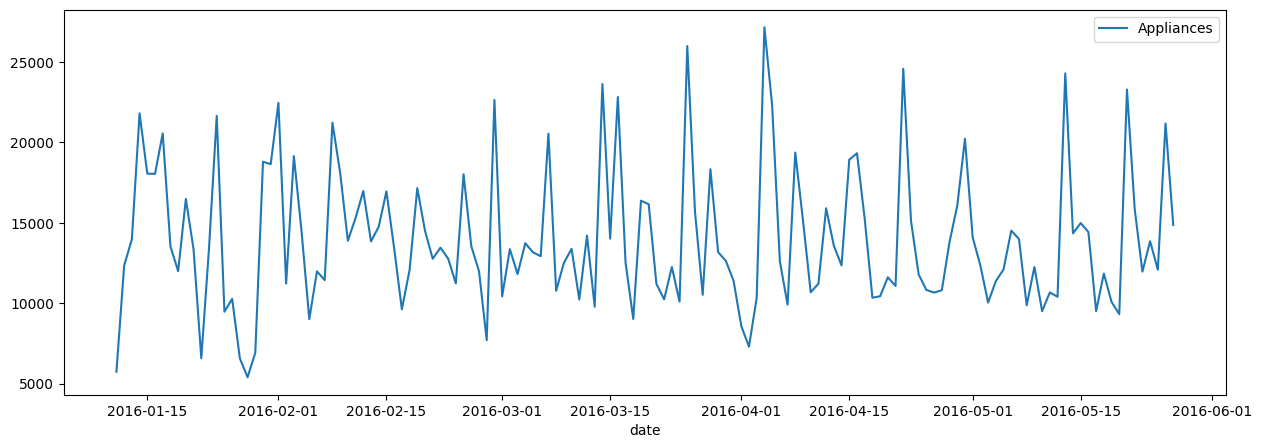

In [ ]:
df.plot(x='date', y='Appliances',figsize=(15, 5))

In [ ]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2016-01-11,5740
1,2016-01-12,12340
2,2016-01-13,13970
3,2016-01-14,21800
4,2016-01-15,18050


##Fitting the Prophet Model

In [ ]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj1ocofp/_6ldbg3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj1ocofp/5qng1bct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66092', 'data', 'file=/tmp/tmpxj1ocofp/_6ldbg3d.json', 'init=/tmp/tmpxj1ocofp/5qng1bct.json', 'output', 'file=/tmp/tmpxj1ocofp/prophet_modelmsje8q6o/prophet_model-20240724060531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:05:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:05:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = model.make_future_dataframe(periods=365, freq='d', include_history=True)
prediction = model.predict(future_dates)

In [ ]:
trace_open = go.Scatter(x=prediction["ds"], y=prediction["yhat"], mode='lines', name="Forecast")
trace_high = go.Scatter(x=prediction["ds"], y=prediction["yhat_upper"], mode='lines', fill="tonexty", line={"color": "#57b8ff"}, name="Higher uncertainty interval")
trace_low = go.Scatter(x=prediction["ds"], y=prediction["yhat_lower"], mode='lines', fill="tonexty", line={"color": "#57b8ff"}, name="Lower uncertainty interval")
trace_close = go.Scatter(x=df["ds"], y=df["y"], name="Data values")

data = [trace_open, trace_high, trace_low, trace_close]
layout = go.Layout(title="Energy Consumption Forecasting")

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
y_true = df['y'].values
y_pred = prediction['yhat'][:len(df)].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 3225.845


##Optimizing the Model

In [ ]:
model_opt = Prophet(daily_seasonality=True).add_seasonality(name='yearly', period=365, fourier_order=70)
model_opt.fit(df)

future_dates = model_opt.make_future_dataframe(periods=365, freq='d', include_history=True)

prediction = model_opt.predict(future_dates)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj1ocofp/vzpkzole.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj1ocofp/9ymz41vz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52075', 'data', 'file=/tmp/tmpxj1ocofp/vzpkzole.json', 'init=/tmp/tmpxj1ocofp/9ymz41vz.json', 'output', 'file=/tmp/tmpxj1ocofp/prophet_model5gnl1al8/prophet_model-20240724060932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:09:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:09:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
trace_open = go.Scatter(x=prediction["ds"], y=prediction["yhat"], mode='lines', name="Forecast")
trace_high = go.Scatter(x=prediction["ds"], y=prediction["yhat_upper"], mode='lines', fill="tonexty", line={"color": "#57b8ff"}, name="Higher uncertainty interval")
trace_low = go.Scatter(x=prediction["ds"], y=prediction["yhat_lower"], mode='lines', fill="tonexty", line={"color": "#57b8ff"}, name="Lower uncertainty interval")
trace_close = go.Scatter(x=df["ds"], y=df["y"], name="Data values")

data = [trace_open, trace_high, trace_low, trace_close]
layout = go.Layout(title="Energy Consumption Forecasting")

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
y_true = df['y'].values
y_pred = prediction['yhat'][:len(df)].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 2324.518
